<a href="https://colab.research.google.com/github/FelipeFerAl/ImageProcessing/blob/main/Talleres/Taller2_PDI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PUNTO 1
Generar un subset de imágenes mnist con ruido blanco Gaussiano. Luego crear y_train2 y y_test2 con solo 2 clases:

Si el numero es <5 --> 0; si el numero es >=5 --> 1

La red funcional debe tener 2 entradas (imagen, imagen con ruido) y 2 salidas (número de la imagen, su parte binaria -reconociendo si es menor o mayor a 5)

In [7]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pickle
from IPython.display import clear_output
!sudo apt install megatools -y
clear_output()

In [ ]:
def noisy_images(x_train, x_test):
  """
  Esta función toma los datos de train y test
  y genera otro dataset con imágenes ruidosas.
  Entrada: Conjunto de train y test original
  Salida: Conjunto de train y test ruidoso
  """
  desv = 0.1     #Desviación estándar del ruido

  ruido = np.random.normal(0, desv, x_train.shape)
  ruido2 = np.random.normal(0, desv, x_test.shape)

  train = np.clip(x_train + ruido, 0, 1)
  test = np.clip(x_test + ruido2, 0, 1)
  return train, test

def binary_label(y_train, y_test):
  """
  Esta función toma las etiquetas de train y test
  y genera otras etiquetas para clasificación
  binaria.
  Entrada: Conjunto de etiquetas originales
  Salida: Etiquetas binarias
  """
  y_train2 = np.where(y_train < 5, 0, 1)
  y_test2 = np.where(y_test < 5, 0, 1)
  return y_train2, y_test2

In [2]:
# Carga de códigos previamente entrenados
!git clone https://github.com/FelipeFerAl/ImageProcessing.git

Cloning into 'ImageProcessing'...
remote: Enumerating objects: 181, done.
remote: Counting objects: 100% (181/181), done.
remote: Compressing objects: 100% (175/175), done.
remote: Total 181 (delta 82), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (181/181), 62.96 MiB | 16.46 MiB/s, done.
Resolving deltas: 100% (82/82), done.


In [ ]:
# Carga de la base de datos original
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Normalización de los datos
x_train = x_train/255
x_test = x_test/255

# Creación de los datasets de imágenes con ruido
x_train2, x_test2 = noisy_images(x_train, x_test)

# Creación de las etiquetas binarias
y_train2, y_test2 = binary_label(y_train, y_test)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


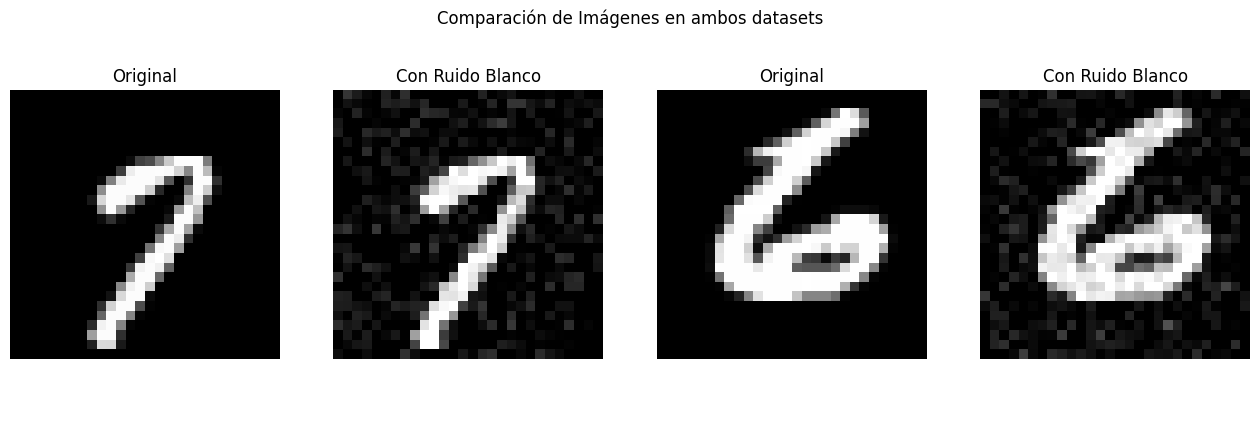

In [ ]:
idx = 9999
plt.figure(figsize=(16,5)), plt.title('Comparación de Imágenes en ambos datasets'), plt.axis("off")
plt.subplot(1,4,1), plt.imshow(x_train[idx], cmap="gray"), plt.title("Original"), plt.axis("off")
plt.subplot(1,4,2), plt.imshow(x_train2[idx], cmap="gray"), plt.title("Con Ruido Blanco"), plt.axis("off")
plt.subplot(1,4,3), plt.imshow(x_test[idx], cmap="gray"), plt.title("Original"), plt.axis("off")
plt.subplot(1,4,4), plt.imshow(x_test2[idx], cmap="gray"), plt.title("Con Ruido Blanco"), plt.axis("off")
plt.show()

In [ ]:
# Prueba de las etiquetas
idxs = [435,678,1269,6407]
for idx in idxs:
  print(f"Etiqueta Original: {y_test[idx]} ; Etiqueta Binaria: {y_test2[idx]}")

Etiqueta Original: 8 ; Etiqueta Binaria: 1
Etiqueta Original: 9 ; Etiqueta Binaria: 1
Etiqueta Original: 2 ; Etiqueta Binaria: 0
Etiqueta Original: 1 ; Etiqueta Binaria: 0


CÓDIGO DE LA RED FUNCIONAL

In [ ]:
input_1 = tf.keras.layers.Input(shape=(28,28))
input_2 = tf.keras.layers.Input(shape=(28,28))

fusion = tf.keras.layers.Concatenate()([input_1, input_2])
plano = tf.keras.layers.Flatten()(fusion)

linea1 = tf.keras.layers.Dense(128, activation='relu')(plano)
linea2 = tf.keras.layers.Dense(64, activation='relu')(linea1)

output1 = tf.keras.layers.Dense(10, activation='softmax')(linea2)
output2 = tf.keras.layers.Dense(1, activation='sigmoid')(linea2)

model = tf.keras.Model(inputs=[input_1, input_2], outputs=[output1, output2])
model.compile(optimizer='adam',
              loss=['sparse_categorical_crossentropy', 'binary_crossentropy'],
              metrics=['accuracy', 'accuracy'])

In [ ]:
# model.fit([x_train, x_train2], [y_train, y_train2], epochs=10, validation_data=([x_test, x_test2], [y_test, y_test2]))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - dense_41_accuracy: 0.8819 - dense_41_loss: 0.3932 - dense_42_accuracy: 0.9133 - dense_42_loss: 0.2090 - loss: 0.6022 - val_dense_41_accuracy: 0.9547 - val_dense_41_loss: 0.1445 - val_dense_42_accuracy: 0.9719 - val_dense_42_loss: 0.0847 - val_loss: 0.2295
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - dense_41_accuracy: 0.9677 - dense_41_loss: 0.1079 - dense_42_accuracy: 0.9795 - dense_42_loss: 0.0612 - loss: 0.1691 - val_dense_41_accuracy: 0.9689 - val_dense_41_loss: 0.1013 - val_dense_42_accuracy: 0.9758 - val_dense_42_loss: 0.0722 - val_loss: 0.1737
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - dense_41_accuracy: 0.9793 - dense_41_loss: 0.0694 - dense_42_accuracy: 0.9849 - dense_42_loss: 0.0428 - loss: 0.1122 - val_dense_41_accuracy: 0.9727 - val_dense_41_loss: 0.0910 - val_dense_42_accuracy: 0.9820 - val_dense_42_loss: 0.0553 - val_loss: 0.1465
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - dens

In [ ]:
model = tf.keras.models.load_model('/content/ImageProcessing/Talleres/Taller2Files/modelo_mnist.keras')

In [ ]:
y_pred1, y_pred2 = model.predict([x_test, x_test2])

y_pred1 = np.argmax(y_pred1, axis=1)
y_pred2 = np.round(y_pred2).astype(int)

for idx in idxs:
  if y_pred2[idx] == 0:
    text = "Menor a 5"
  else:
    text = "5 o Mayor"
  print(f"Etiquetas - Real: {y_test[idx]} ; Predicha: {y_pred1[idx]}; Binaria: {text}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Etiquetas - Real: 8 ; Predicha: 8; Binaria: 5 o Mayor
Etiquetas - Real: 9 ; Predicha: 9; Binaria: 5 o Mayor
Etiquetas - Real: 2 ; Predicha: 2; Binaria: Menor a 5
Etiquetas - Real: 1 ; Predicha: 1; Binaria: Menor a 5


In [ ]:
accurate = 0
accurate2 = 0
for i in range(len(y_pred1)):
  if y_test[i] == y_pred1[i]:
    accurate += 1
  if y_test2[i] == y_pred2[i]:
    accurate2 += 1
print(f"La precisión del modelo para clasificación numérica: {round(accurate/len(y_pred1),3)*100}%")
print(f"La precisión del modelo para clasificación binaria: {round(accurate2/len(y_pred2),3)*100}%")

La precisión del modelo para clasificación numérica: 97.5%
La precisión del modelo para clasificación binaria: 98.1%


In [ ]:
# model.save('modelo_mnist.keras')

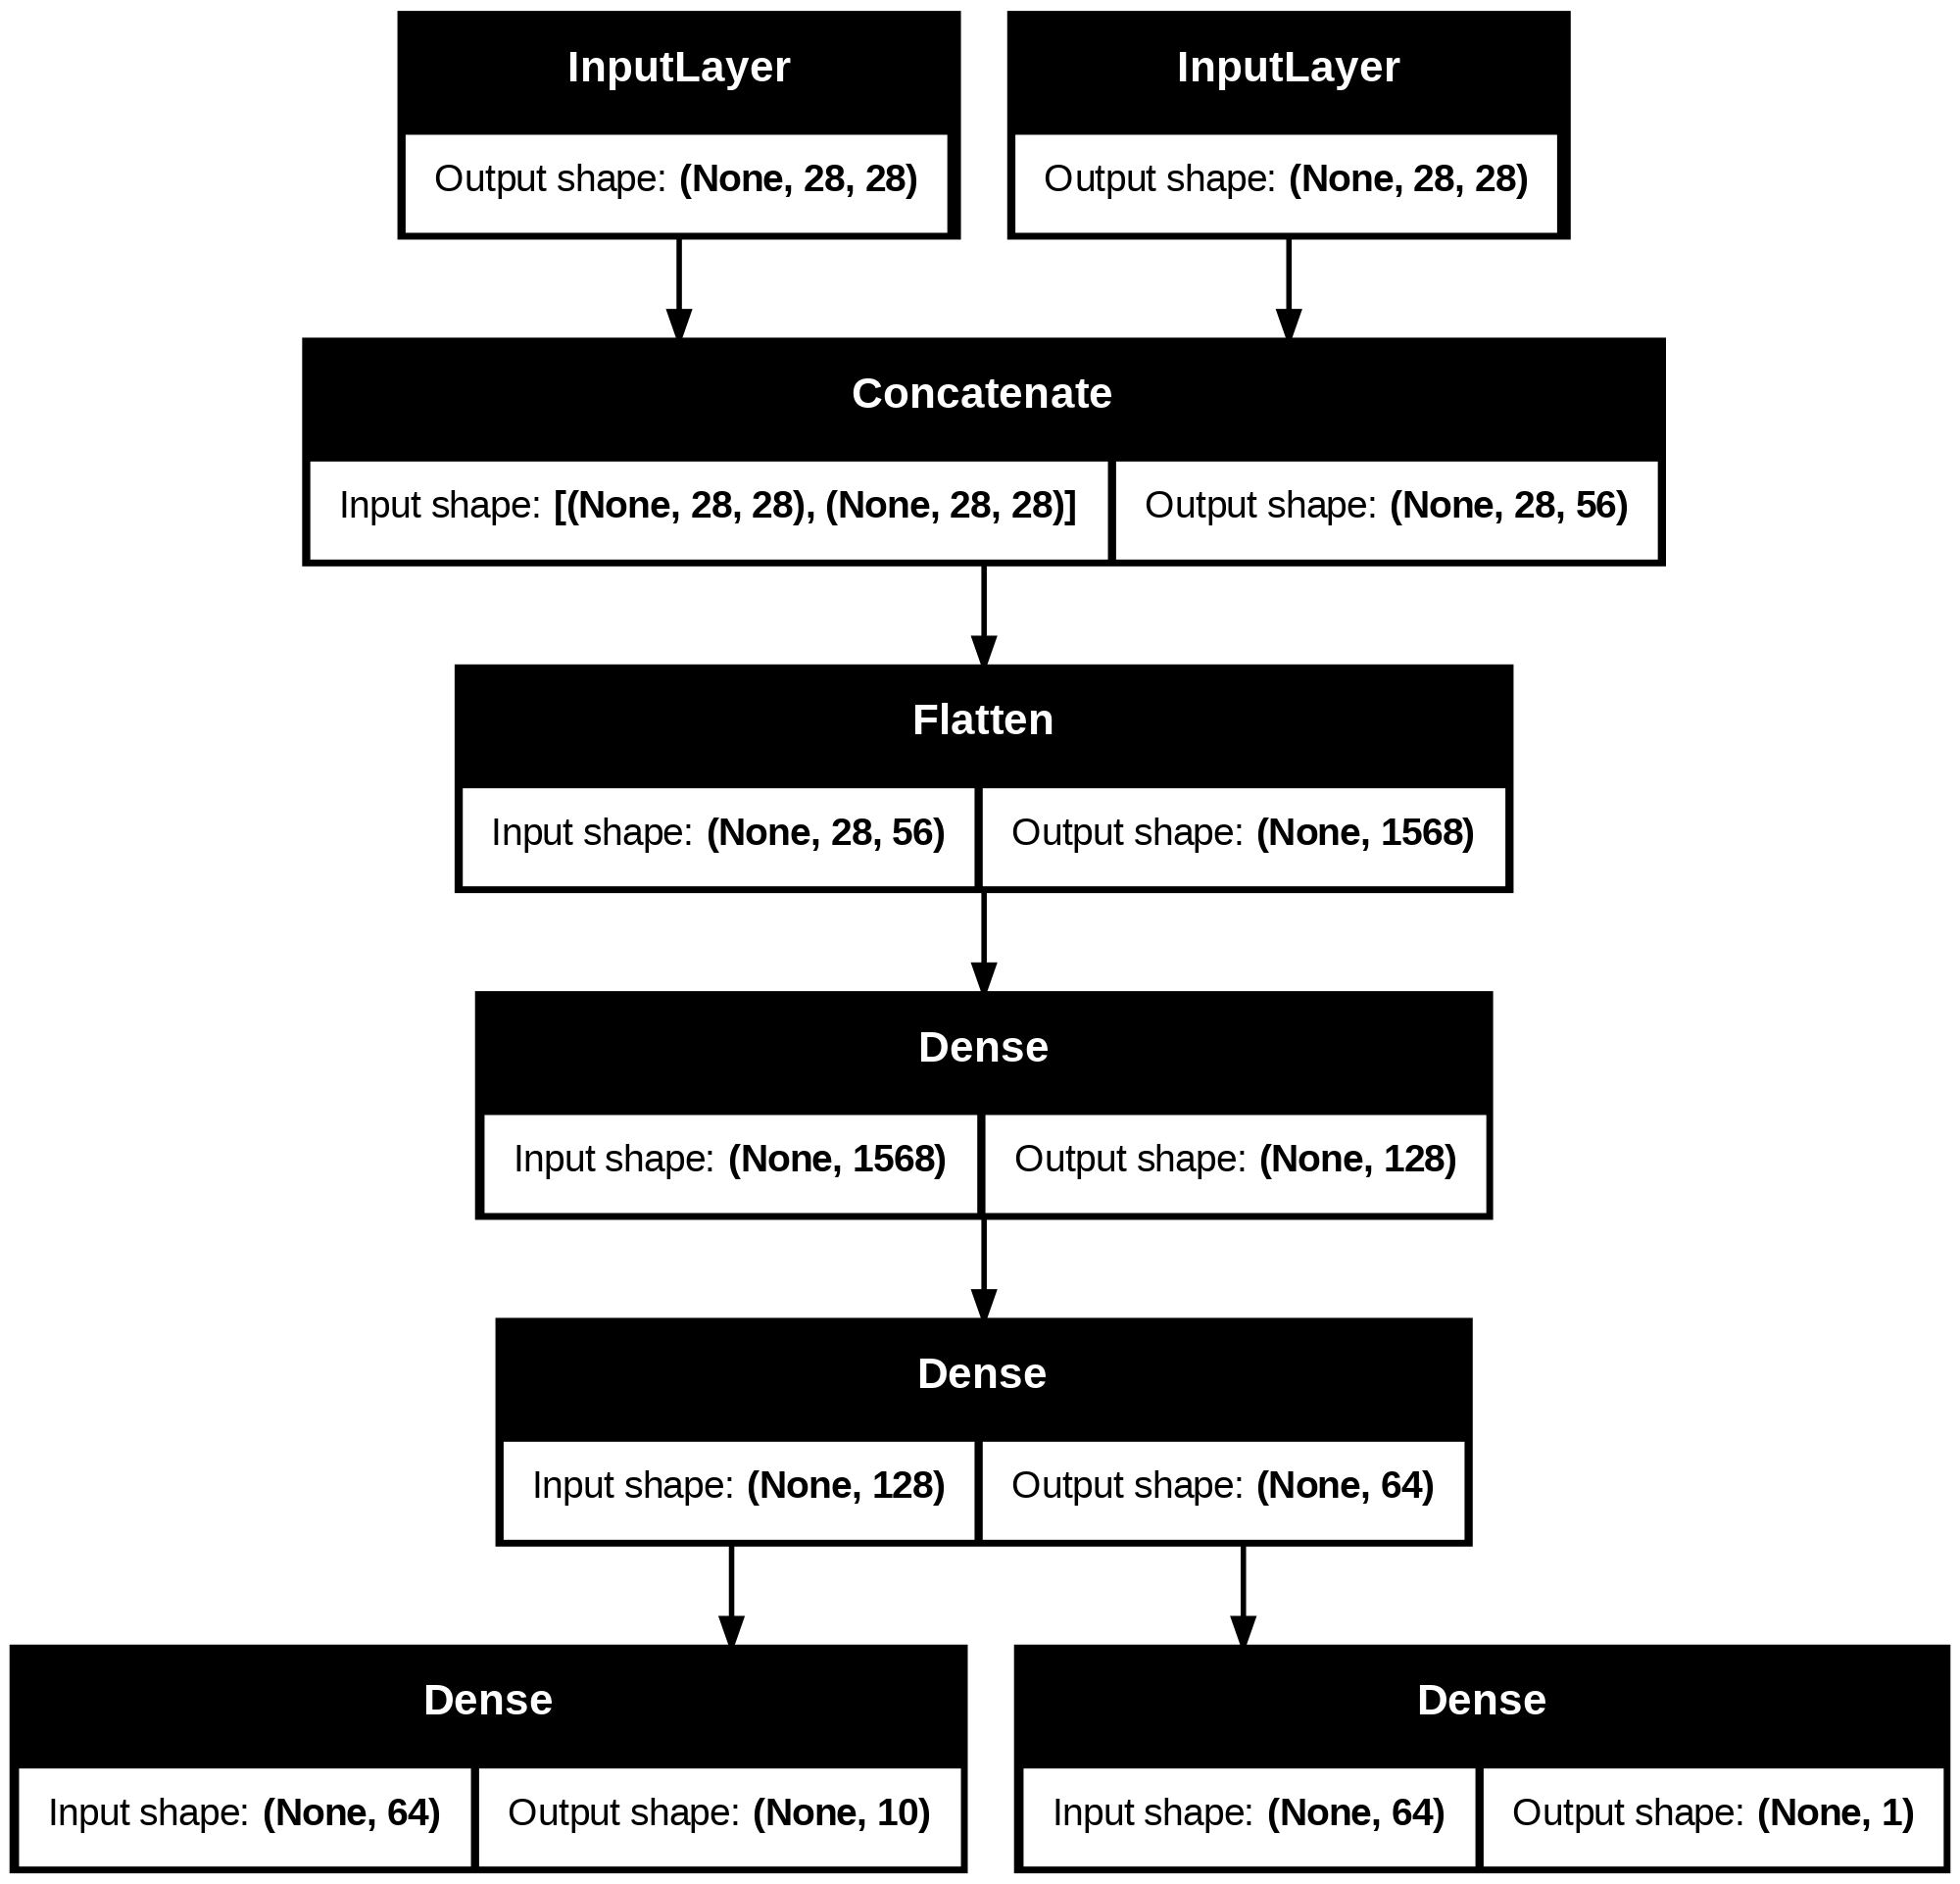

In [ ]:
tf.keras.utils.plot_model(model, show_shapes=True)

# Punto 2
Diseñar un modelo funcional para las bases Fashion Mnist, Cifar10 y Cifar100

**Fashion Mnist**

In [ ]:
# Carga de los datos y Normalización
(x_train, y_train_fm), (x_test, y_test_fm) = tf.keras.datasets.fashion_mnist.load_data()

x_train_fm = x_train/255
x_test_fm = x_test/255

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


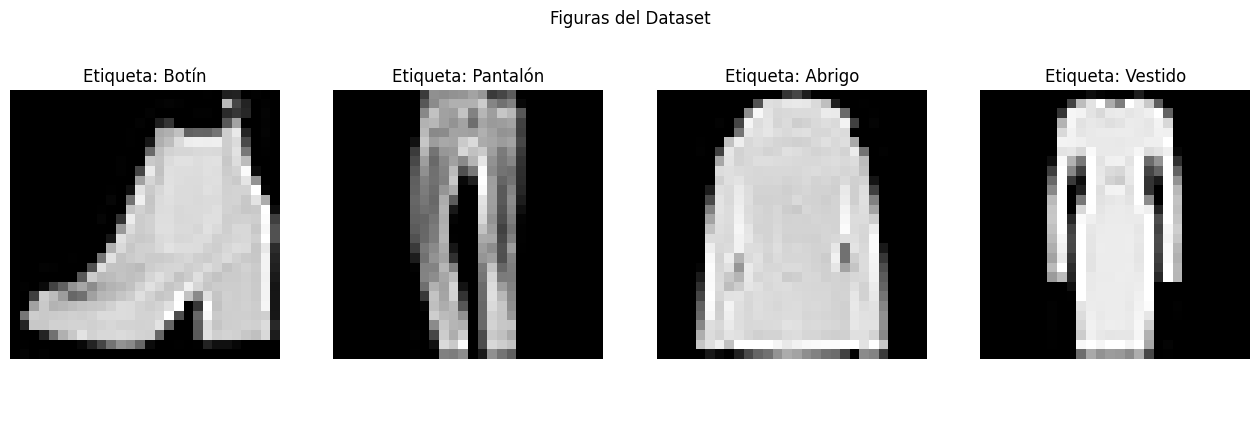

In [ ]:
# Etiquetas en la base de datos
labels = ['Camiseta','Pantalón','Suéter','Vestido','Abrigo','Sandalia','Camisa','Zapatilla','Bolso','Botín']

idxs2 = [800,1500,2000,2500]
plt.figure(figsize=(16,5)), plt.title('Figuras del Dataset'), plt.axis('off')
for idx in idxs2:
  plt.subplot(1,4,idxs2.index(idx)+1)
  plt.imshow(x_train_fm[idx], cmap="gray"), plt.title(f"Etiqueta: {labels[y_train_fm[idx]]}"), plt.axis('off')
plt.show()

In [ ]:
input_fm = tf.keras.layers.Input(shape=(28,28))
A1 = tf.keras.layers.Flatten()(input_fm)
A2 = tf.keras.layers.Dense(512, activation='relu')(A1)
A3 = tf.keras.layers.Dense(128, activation='relu')(A2)
A4 = tf.keras.layers.Dense(32, activation='relu')(A3)
output_fm = tf.keras.layers.Dense(10, activation='softmax')(A4)

model_fm = tf.keras.Model(inputs=input_fm, outputs=output_fm)
model_fm.compile(optimizer='adam',
                 loss='sparse_categorical_crossentropy',
                 metrics=['accuracy'],)

In [ ]:
model_fm = tf.keras.models.load_model('content/ImageProcessing/Talleres/Taller2Files/modelo_fashion_mnist.keras')

In [ ]:
# model_fm.fit(x_train_fm, y_train_fm, epochs=10, validation_split=0.3)

Epoch 1/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.7598 - loss: 0.6782 - val_accuracy: 0.8399 - val_loss: 0.4400
Epoch 2/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 20s 10ms/step - accuracy: 0.8570 - loss: 0.3911 - val_accuracy: 0.8722 - val_loss: 0.3530
Epoch 3/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step - accuracy: 0.8736 - loss: 0.3453 - val_accuracy: 0.8667 - val_loss: 0.3669
Epoch 4/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 22s 10ms/step - accuracy: 0.8812 - loss: 0.3216 - val_accuracy: 0.8785 - val_loss: 0.3362
Epoch 5/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 21s 10ms/step - accuracy: 0.8931 - loss: 0.2934 - val_accuracy: 0.8797 - val_loss: 0.3321
Epoch 6/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 19s 9ms/step - accuracy: 0.8963 - loss: 0.2786 - val_accuracy: 0.8817 - val_loss: 0.3443
Epoch 7/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 21s 10ms/step - accuracy: 0.9023 - loss: 0.2620 - val_accuracy: 0.8807 - val_loss: 0.3297
Epoch 8/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 13s 10ms/step - accuracy: 0.9047 - l

In [ ]:
y_pred_fm = model_fm.predict(x_test_fm)

y_pred_fm = np.argmax(y_pred_fm, axis=1)

accurate = 0
for i in range(len(y_pred_fm)):
  if y_test_fm[i] == y_pred_fm[i]:
    accurate += 1
print(f"La precisión del modelo es: {round(accurate/len(y_pred_fm),3)*100}%")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
La precisión del modelo es: 88.4%


In [ ]:
# model_fm.save('modelo_fashion_mnist.keras')

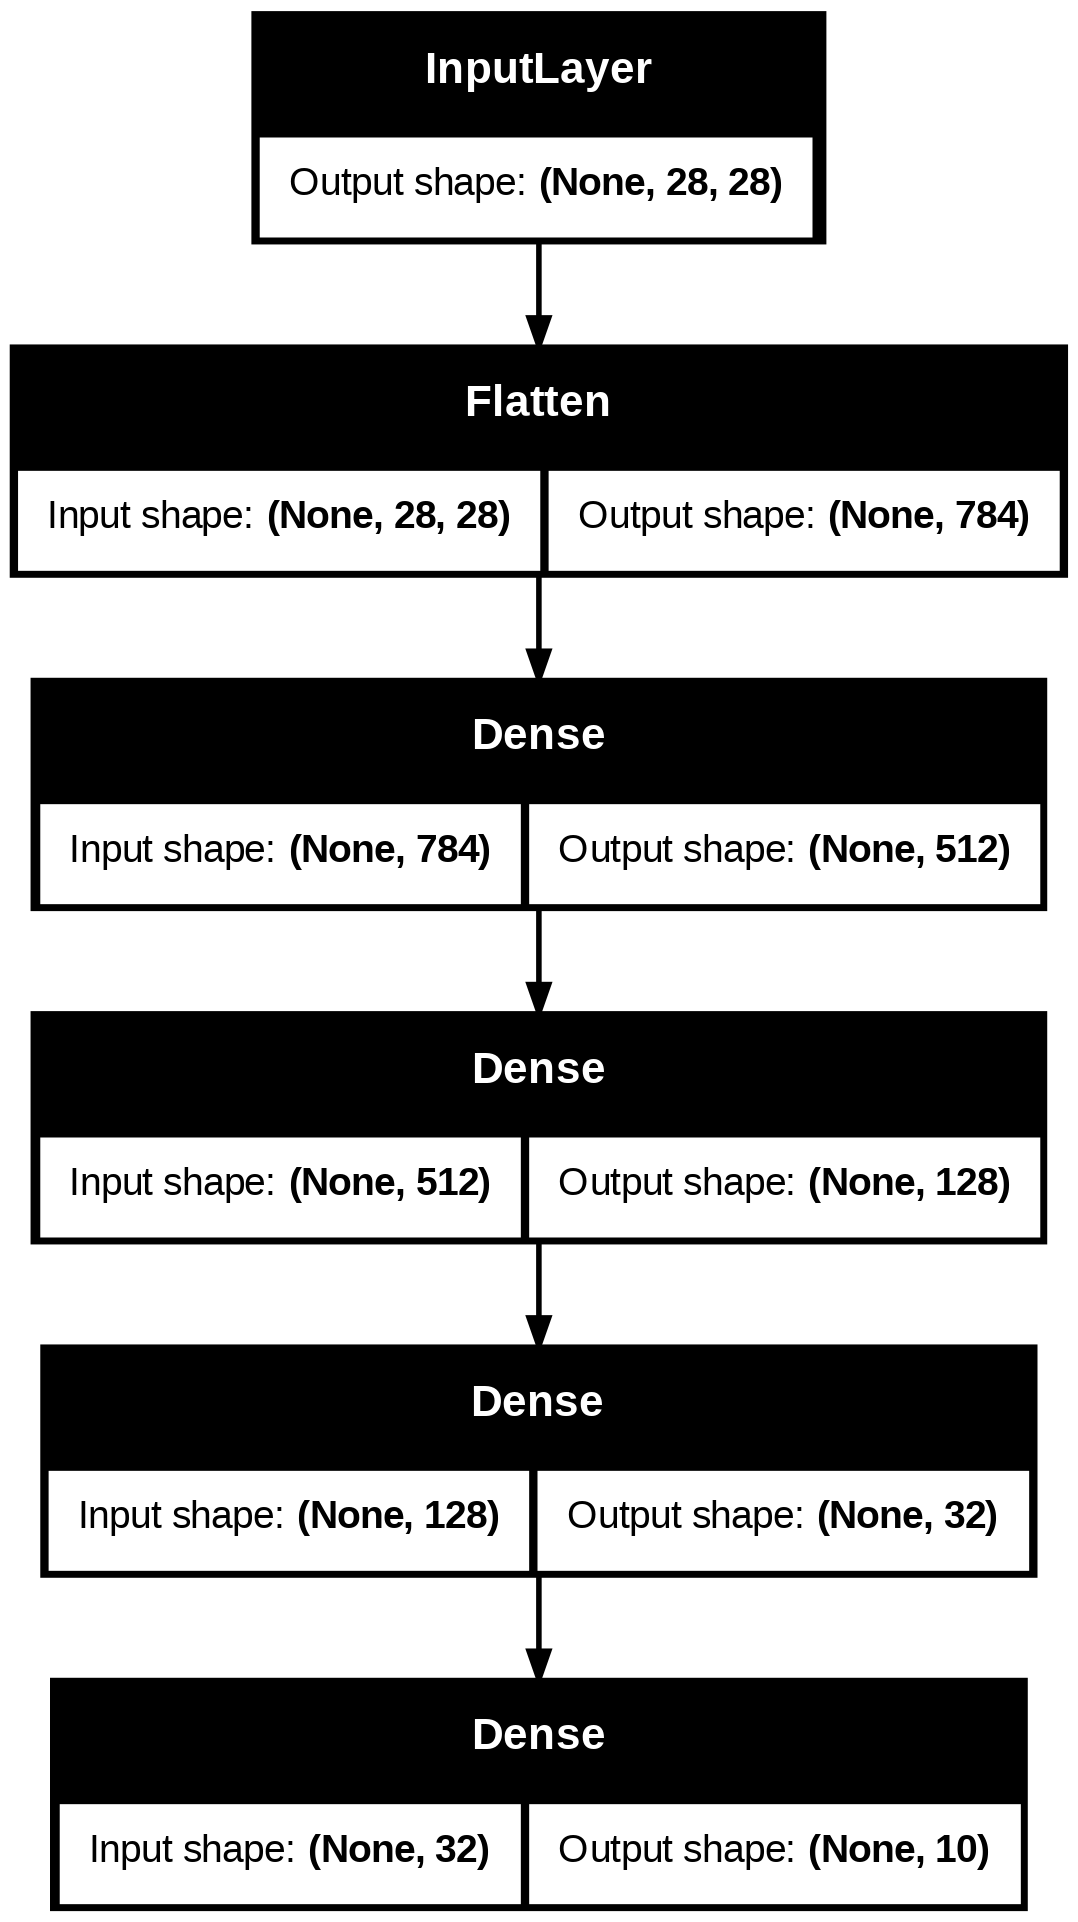

In [ ]:
tf.keras.utils.plot_model(model_fm, show_shapes=True)

**CIFAR10**

In [9]:
# Carga de los datos y Normalización
(x_train_c10, y_train_c10), (x_test_c10, y_test_c10) = tf.keras.datasets.cifar10.load_data()

x_train_c10, x_test_c10 = x_train_c10/255, x_test_c10/255
y_train_c10, y_test_c10 = y_train_c10.squeeze(), y_test_c10.squeeze()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


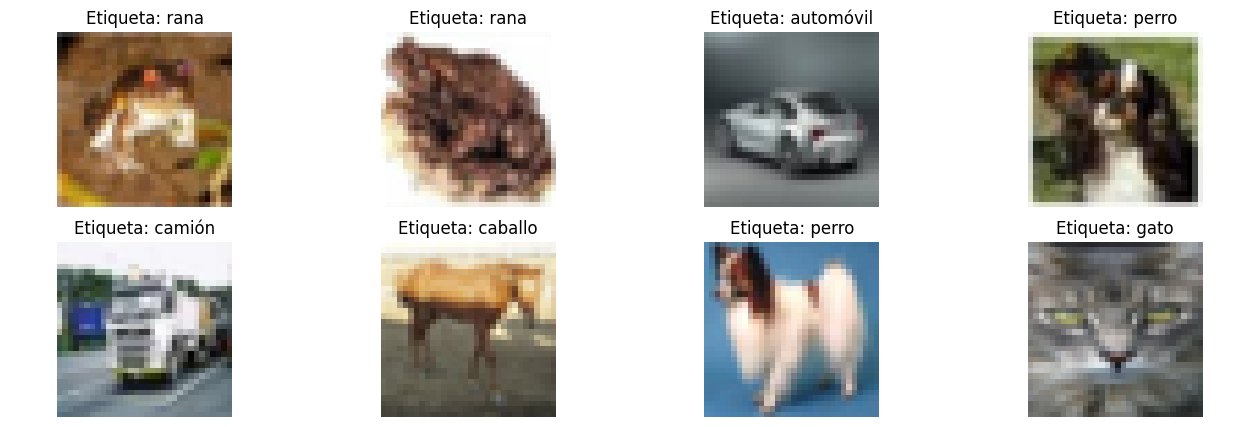

In [ ]:
labels2 = ['avión','automóvil','ave','gato','ciervo','perro','rana','caballo','barco','camión']

idxs3 = [0,125,250,500,1000,2000,4000,8000]
plt.figure(figsize=(16,5)), plt.axis('off')
for idx in idxs3:
  plt.subplot(2,4,idxs3.index(idx)+1)
  plt.imshow(x_train_c10[idx]), plt.title(f"Etiqueta: {labels2[y_train_c10[idx]]}"), plt.axis('off')

In [ ]:
input_c10 = tf.keras.layers.Input(shape=(32,32,3))
B1 = tf.keras.layers.Flatten()(input_c10)
B2 = tf.keras.layers.Dense(1024, activation='relu')(B1)
B3 = tf.keras.layers.Dense(512, activation='relu')(B2)
B4 = tf.keras.layers.Dense(256, activation='relu')(B3)
B5 = tf.keras.layers.Dense(128, activation='relu')(B4)
output_c10 = tf.keras.layers.Dense(10, activation='softmax')(B5)

model_c10 = tf.keras.Model(inputs=input_c10, outputs=output_c10)

optimizer = tf.keras.optimizers.Adam(learning_rate=0.0010848)
model_c10.compile(optimizer=optimizer,
                 loss='sparse_categorical_crossentropy',
                 metrics=['accuracy'],)

In [8]:
!megadl "https://mega.nz/file/fzoVVaJR#vo5bsQIvUxgUM9AqcTyiv8B7pm6pEATA73po_HXEoJ0"
model_c10 = tf.keras.models.load_model('/content/modelo_c10.keras')

Downloaded modelo_c10.keras


In [ ]:
# model_c10.fit(x_train_c10, y_train_c10, epochs=10, validation_split=0.3)

Epoch 1/10
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 64s 56ms/step - accuracy: 0.2323 - loss: 2.0992 - val_accuracy: 0.3362 - val_loss: 1.8626
Epoch 2/10
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 80s 54ms/step - accuracy: 0.3645 - loss: 1.7569 - val_accuracy: 0.3659 - val_loss: 1.7896
Epoch 3/10
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 58s 53ms/step - accuracy: 0.3874 - loss: 1.6956 - val_accuracy: 0.3991 - val_loss: 1.6658
Epoch 4/10
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 82s 53ms/step - accuracy: 0.4128 - loss: 1.6268 - val_accuracy: 0.4228 - val_loss: 1.6149
Epoch 5/10
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 83s 54ms/step - accuracy: 0.4373 - loss: 1.5568 - val_accuracy: 0.4241 - val_loss: 1.5999
Epoch 6/10
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 81s 53ms/step - accuracy: 0.4614 - loss: 1.4973 - val_accuracy: 0.4405 - val_loss: 1.5672
Epoch 7/10
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 83s 54ms/step - accuracy: 0.4606 - loss: 1.4852 - val_accuracy: 0.4457 - val_loss: 1.5401
Epoch 8/10
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 81s 54ms/step - accuracy: 0.4779 -

In [10]:
y_pred_c10 = model_c10.predict(x_test_c10)

y_pred_c10 = np.argmax(y_pred_c10, axis=1)

accurate = 0
for idx in y_pred_c10:
  if y_test_c10[idx] == y_pred_c10[idx]:
    accurate += 1
print(f"La precisión del modelo es: {round(accurate/len(y_pred_c10)*100,3)}%")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
La precisión del modelo es: 70.66%


In [ ]:
# model_c10.save('modelo_c10.keras')

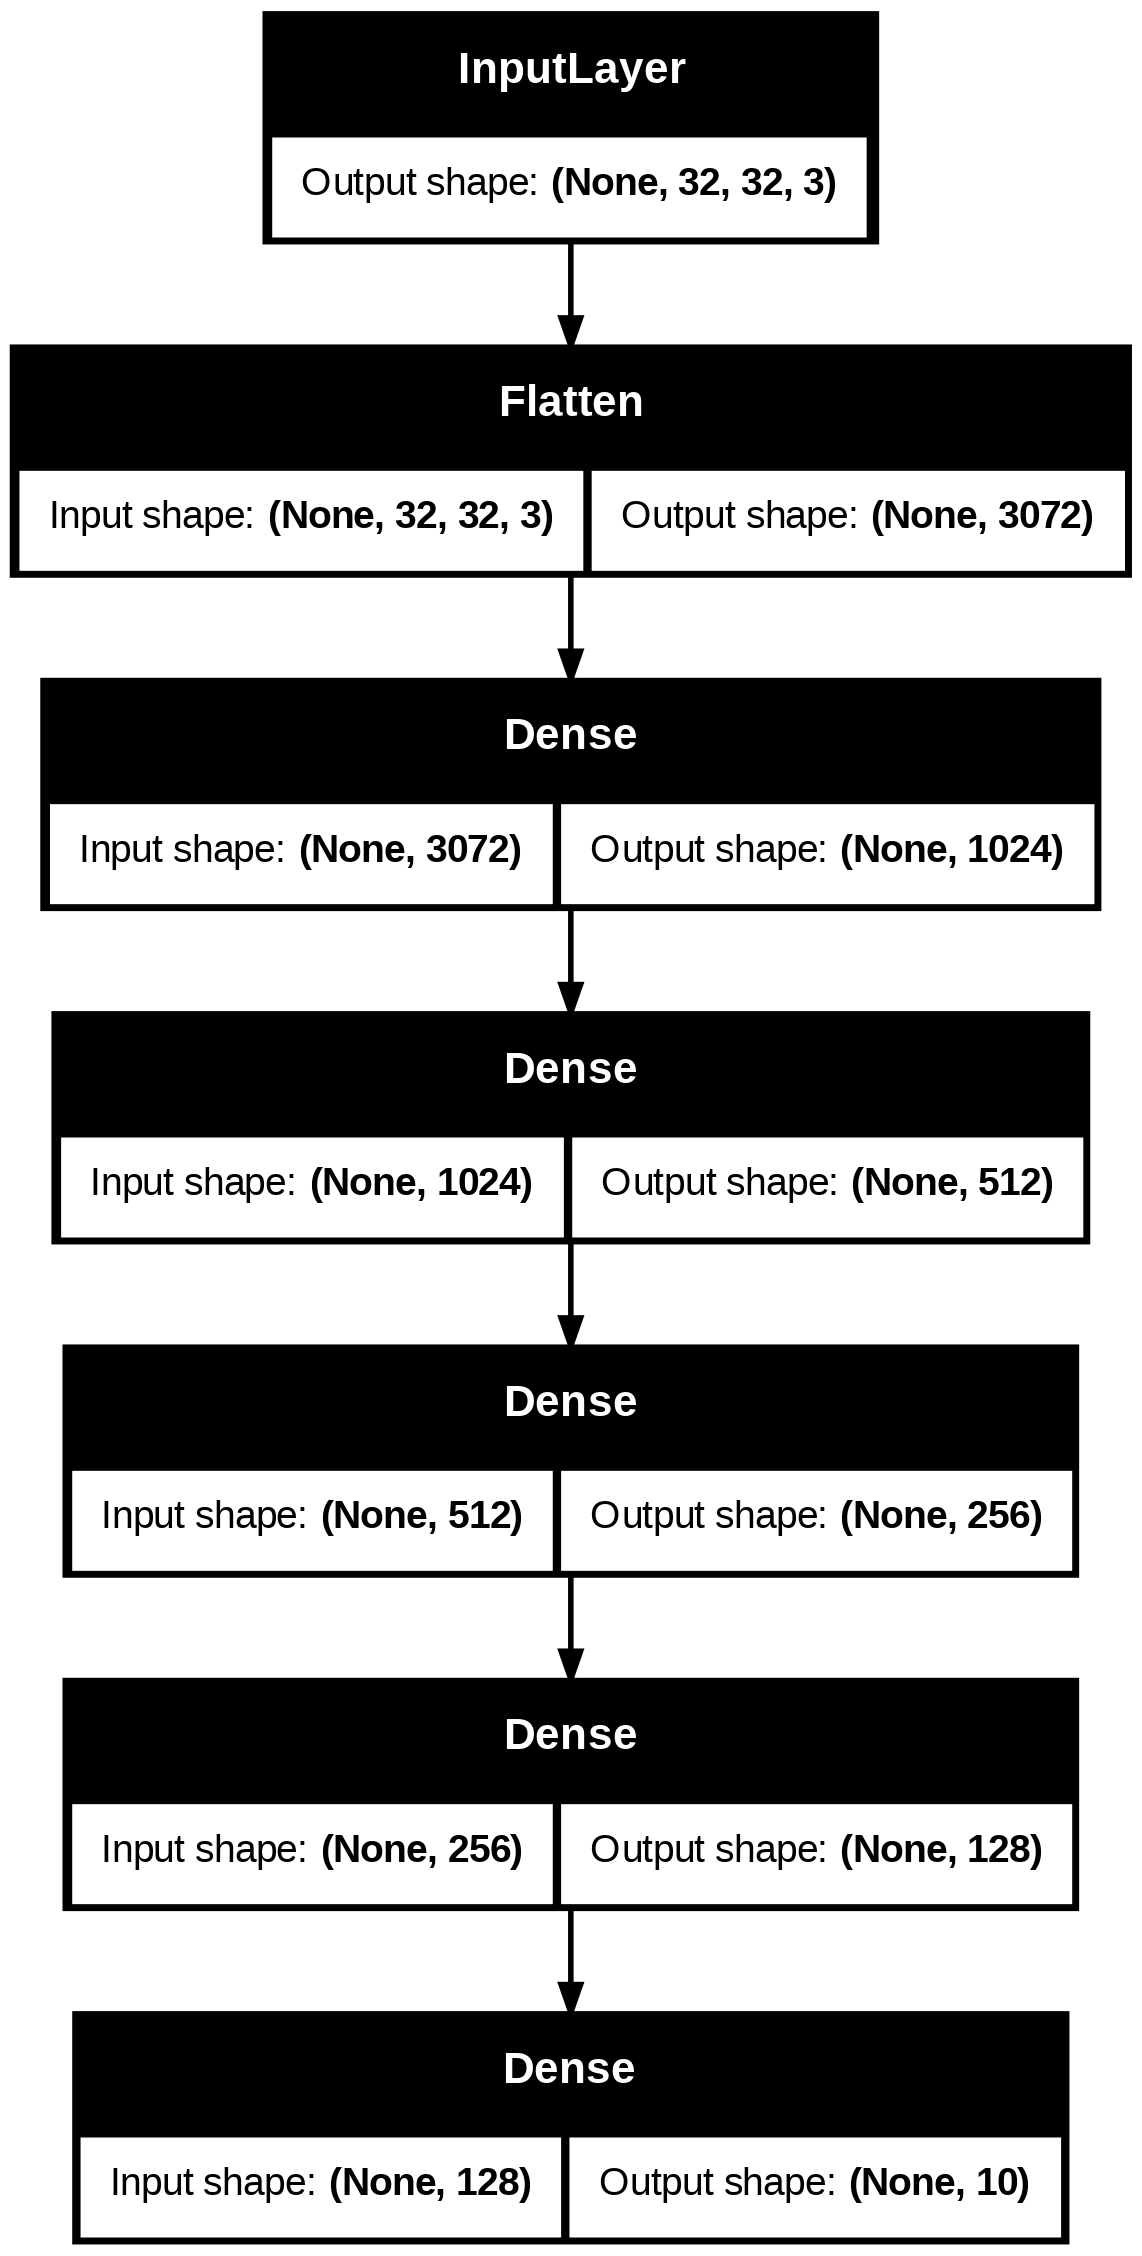

In [ ]:
tf.keras.utils.plot_model(model_c10, show_shapes=True)

**CIFAR100**

In [11]:
# Carga de datos
(x_train_c100, y_train_c100), (x_test_c100, y_test_c100) = tf.keras.datasets.cifar100.load_data()
(_, y_train_coarse), (_, y_test_coarse) = tf.keras.datasets.cifar100.load_data(label_mode="coarse")

x_train_c100, x_test_c100 = x_train_c100/255, x_test_c100/255
y_train_c100, y_test_c100 = y_train_c100.squeeze(), y_test_c100.squeeze()
y_train_coarse, y_test_coarse = y_train_coarse.squeeze(), y_test_coarse.squeeze()

169001437/169001437 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [12]:
# Cargar diccionario de etiquetas
with open('/content/ImageProcessing/Talleres/Taller2Files/meta', 'rb') as f:
    diccionario = pickle.load(f, encoding='latin1')

# Etiquetas por separado
fine_labels = diccionario['fine_label_names']
coarse_labels = diccionario['coarse_label_names']

In [13]:
# Se facilita la indexación con un aplanamiento
y_train_fine = y_train_c100.flatten()
y_train_coarse = y_train_coarse.flatten()

# Diccionario de mapeo
fine_to_coarse = {fine_labels[i]: coarse_labels[y_train_coarse[np.where(y_train_fine == i)][0]] for i in range(len(fine_labels))}

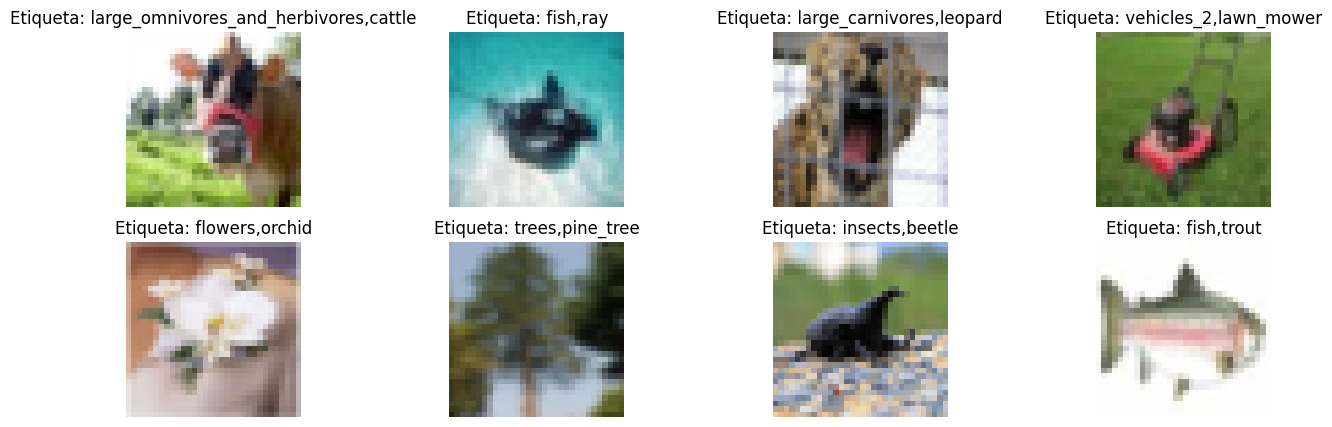

In [ ]:
plt.figure(figsize=(16,5)), plt.axis('off')
for idx in idxs3:
  label = fine_labels[y_train_c100[idx]]
  plt.subplot(2,4,idxs3.index(idx)+1)
  plt.imshow(x_train_c100[idx]), plt.title(f"Etiqueta: {fine_to_coarse[label]},{label}"), plt.axis('off')

In [ ]:
# !megadl ""
# model_c100 = tf.keras.models.load_model('/content/modelo_c100.keras')

In [91]:
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rotation_range=15, width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
datagen.fit(x_train_c100)

In [89]:
input_c100 = tf.keras.layers.Input(shape=(32,32,3))
C1 = tf.keras.layers.Flatten()(input_c100)
C4 = tf.keras.layers.Dense(256, activation='relu')(C1)
C5 = tf.keras.layers.Dense(128, activation='relu')(C4)
# C6 = tf.keras.layers.Dense(128, activation='relu')(C5)
output_c100_fine = tf.keras.layers.Dense(100, activation='softmax')(C5)
# output_c100_coarse = tf.keras.layers.Dense(20, activation='softmax')(C5)

# model_c100 = tf.keras.Model(inputs=input_c100, outputs=[output_c100_fine, output_c100_coarse])
model_c100 = tf.keras.Model(inputs=input_c100, outputs=output_c100_fine)


optimizer = tf.keras.optimizers.Adam(learning_rate=0.0005)
model_c100.compile(optimizer=optimizer,
                 loss='sparse_categorical_crossentropy',
                 metrics=['accuracy','accuracy'],)

In [90]:
model_c100.fit(datagen.flow(x_train_c100, y_train_c100),
               epochs=25, validation_split=0.3)

ValueError: Argument `validation_split` is only supported for tensors or NumPy arrays.Found incompatible type in the input: [<class 'keras.src.legacy.preprocessing.image.NumpyArrayIterator'>]

In [85]:
y_pred_c100_fine, y_pred_c100_coarse = model_c100.predict(x_test_c100)

y_pred_c100_fine = np.argmax(y_pred_c100_fine, axis=1)
y_pred_c100_coarse = np.argmax(y_pred_c100_coarse, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [86]:
accurate = 0
accurate2 = 0
for i in range(len(y_pred_c100_fine)):
  if y_test_c100[i] == y_pred_c100_fine[i]:
    accurate += 1
  if y_test_coarse[i] == y_pred_c100_coarse[i]:
    accurate2 += 1
print(f"La precisión del modelo particular es: {round(accurate/len(y_pred_c100_fine)*100,3)}%")
print(f"La precisión del modelo general es: {round(accurate2/len(y_pred_c100_coarse)*100,3)}%")

La precisión del modelo particular es: 21.62%
La precisión del modelo general es: 32.79%


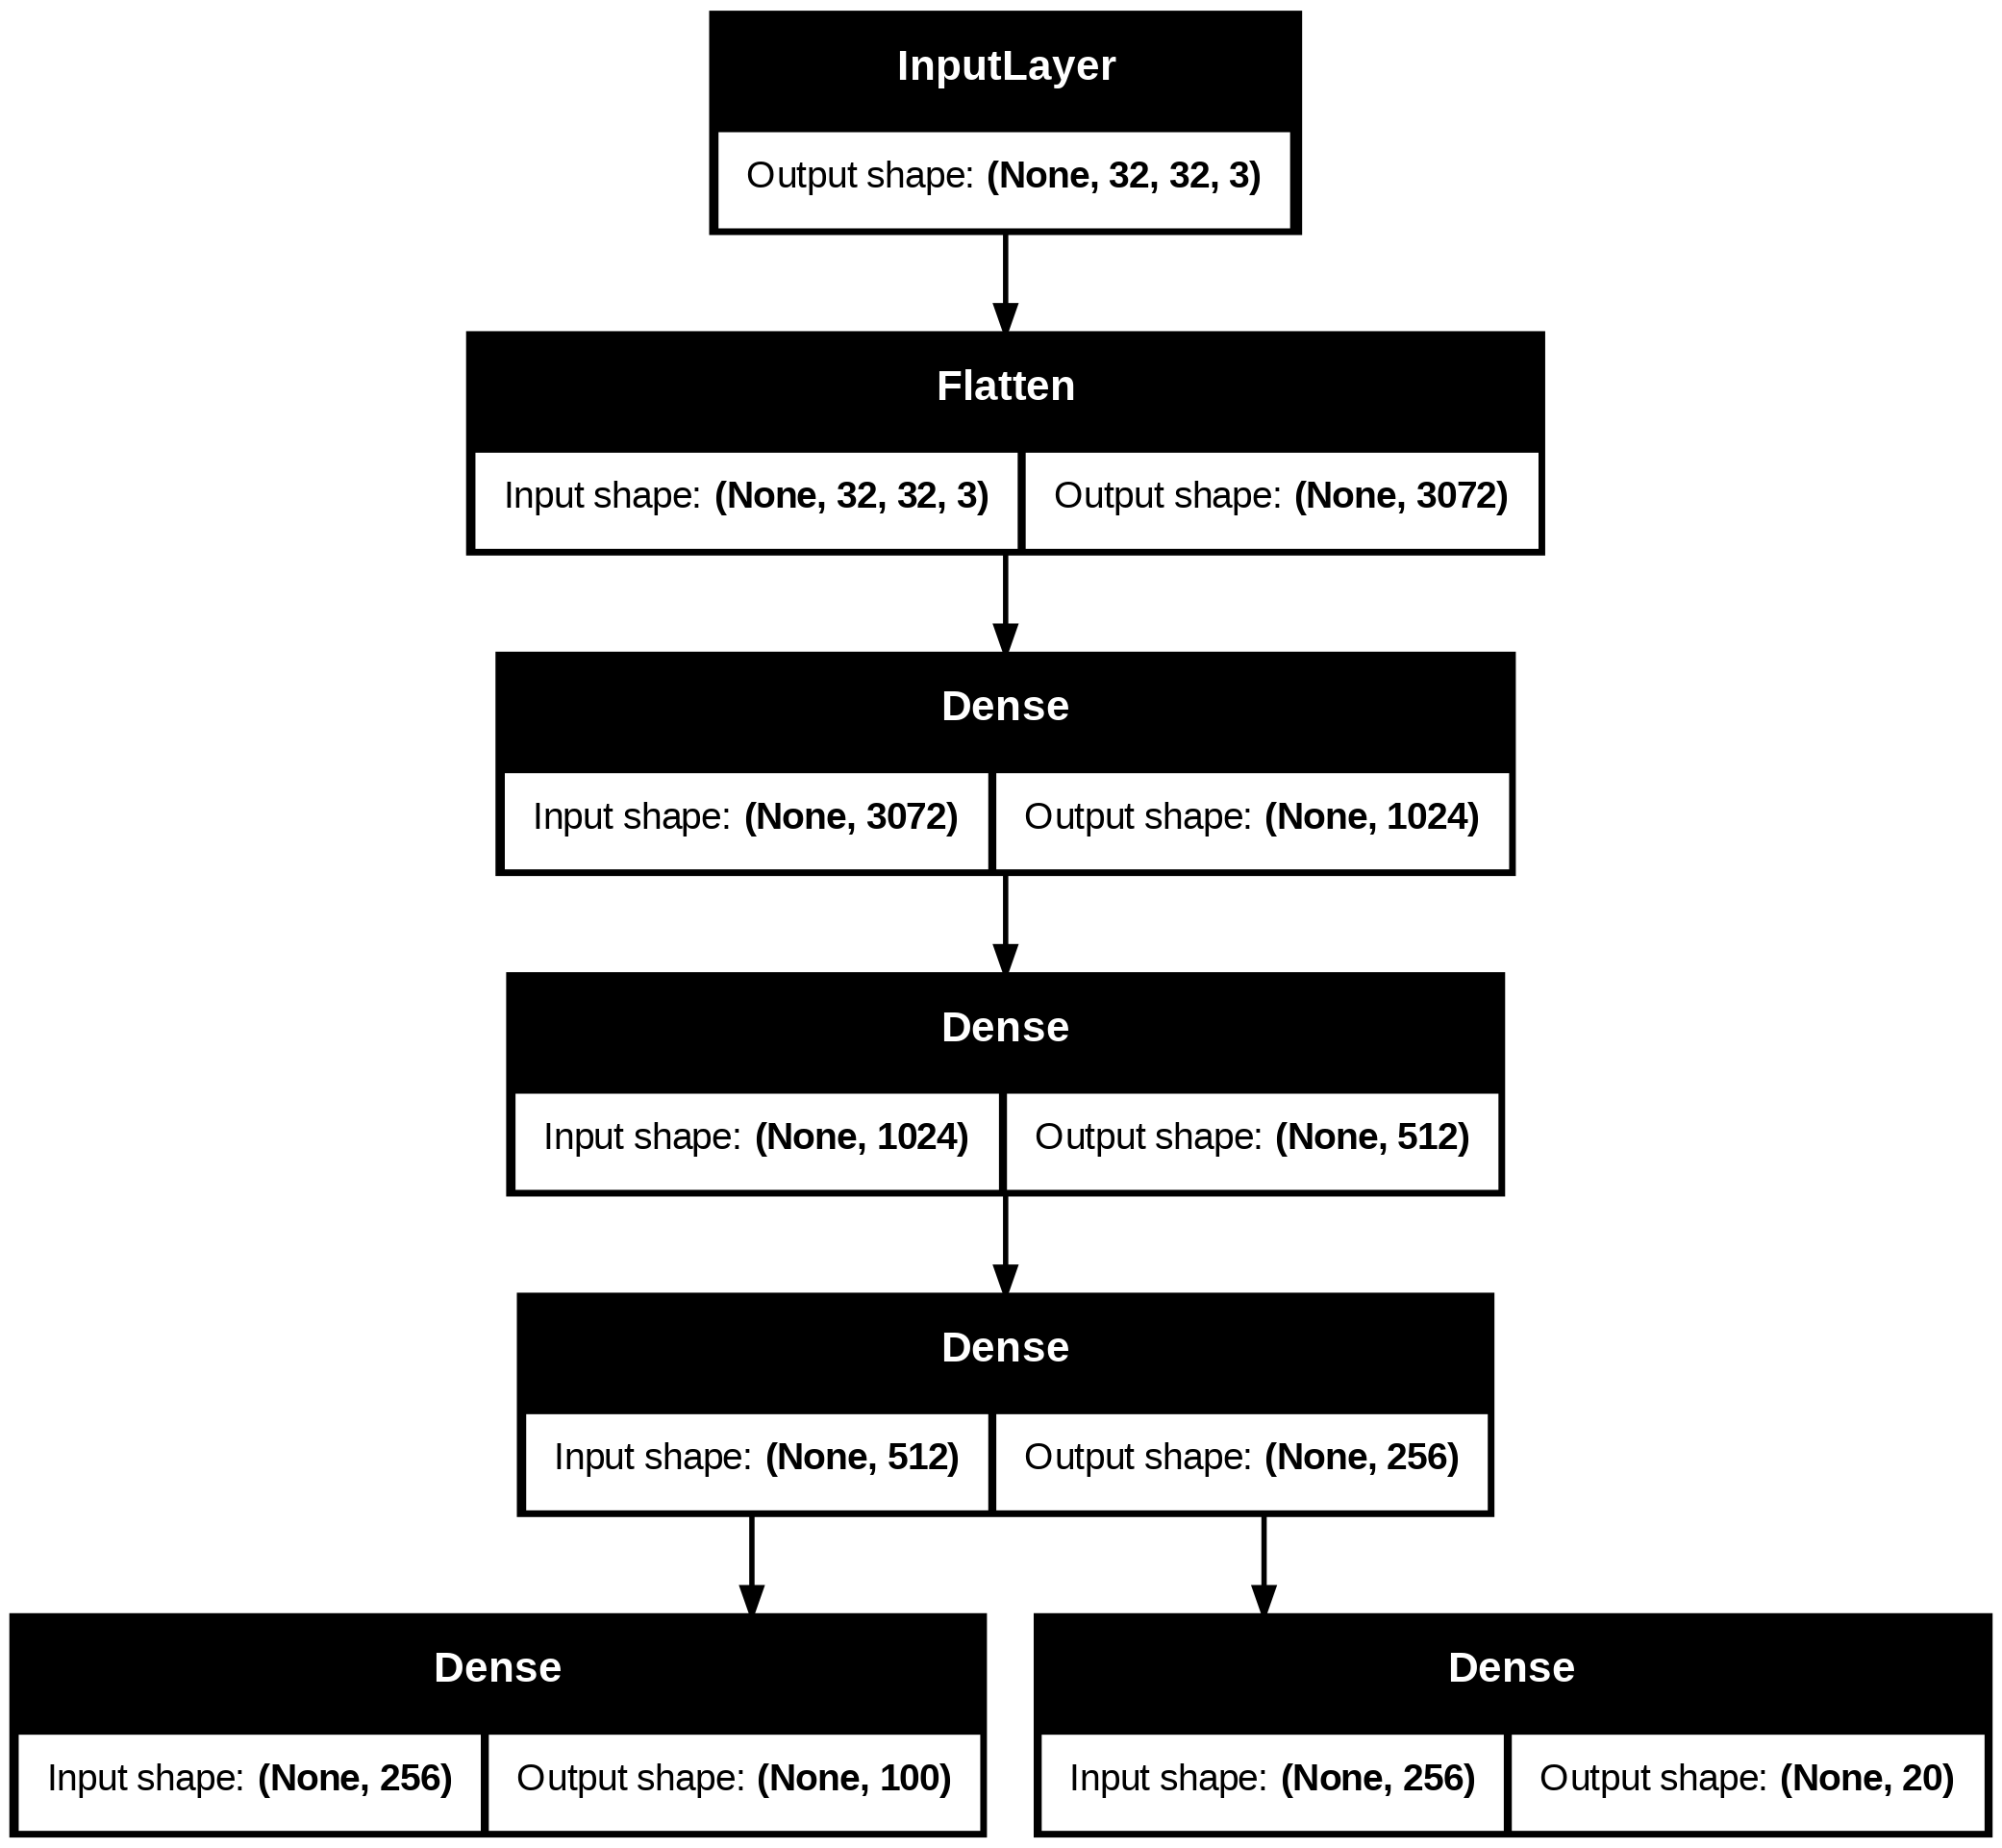

In [ ]:
tf.keras.utils.plot_model(model_c100, show_shapes=True)